Python Notebook is used because it is easier to visualize plots/graphs and write down findings.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r'output/dataset.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                70 non-null     object 
 1   sentiment_polarity  70 non-null     float64
 2   date                70 non-null     object 
 3   closing_price       70 non-null     float64
 4   open_price          70 non-null     float64
 5   daily_high          70 non-null     float64
 6   daily_low           70 non-null     float64
 7   past_change         70 non-null     float64
 8   future_change       70 non-null     float64
 9   day                 70 non-null     int64  
 10  month               70 non-null     int64  
 11  weekday             70 non-null     int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 6.7+ KB


In [20]:
df['day'] = df.day.astype('category')
df['month'] = df.month.astype('category')
df['weekday'] = df.weekday.astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                70 non-null     object  
 1   sentiment_polarity  70 non-null     float64 
 2   date                70 non-null     object  
 3   closing_price       70 non-null     float64 
 4   open_price          70 non-null     float64 
 5   daily_high          70 non-null     float64 
 6   daily_low           70 non-null     float64 
 7   past_change         70 non-null     float64 
 8   future_change       70 non-null     float64 
 9   day                 70 non-null     category
 10  month               70 non-null     category
 11  weekday             70 non-null     category
dtypes: category(3), float64(7), object(2)
memory usage: 7.1+ KB


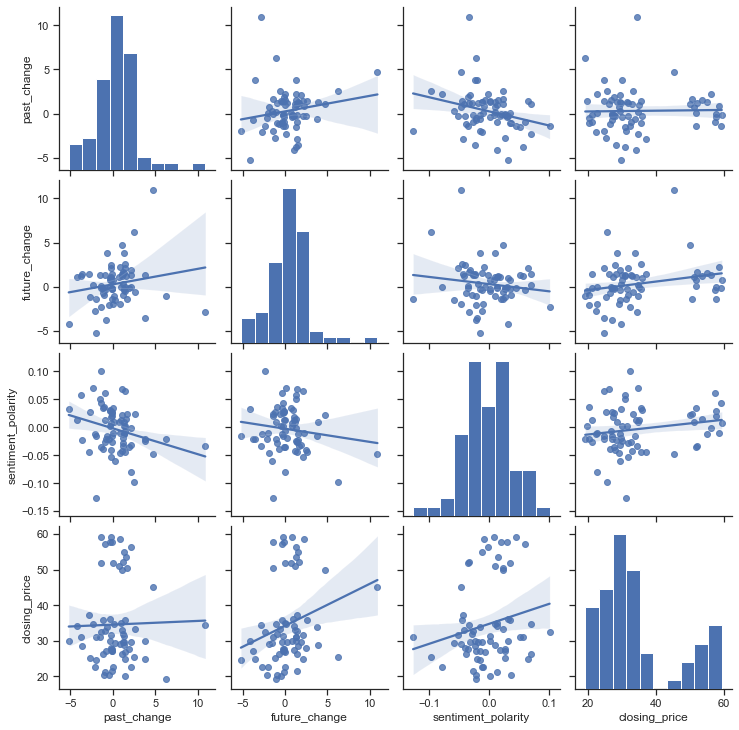

In [37]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['past_change','future_change','sentiment_polarity','closing_price']], kind="reg")

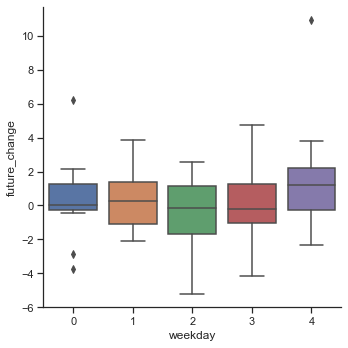

In [29]:
sns.catplot(x="weekday", y="future_change", kind="box", data=df);

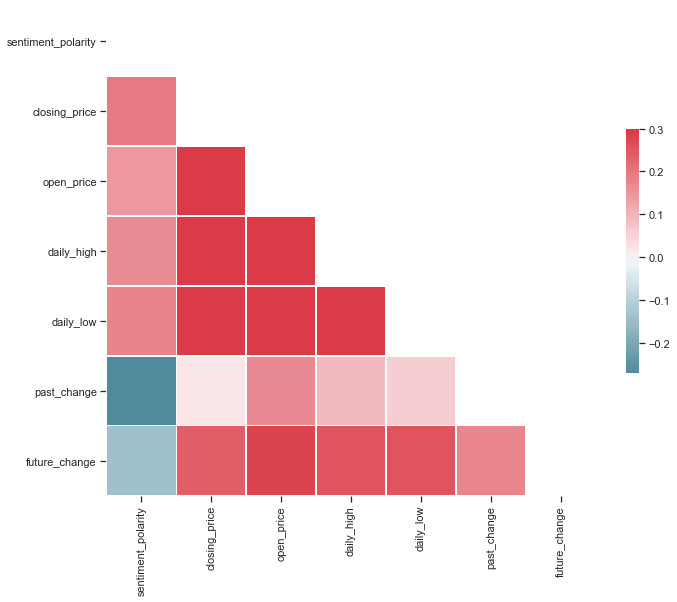

In [35]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})